<a href="https://colab.research.google.com/github/ruchiraravishankar/level-5-project/blob/main/Resnet18_model_trials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import os
import pickle

In [2]:
b_file = open("/content/drive/MyDrive/iam_dataset/d_i.pkl", "rb")
d_i = pickle.load(b_file)
print(d_i)

{'e01-062': '213', 'e01-059': '213', 'e01-086': '214', 'e01-092': '215', 'e01-102': '215', 'e01-113': '216', 'e01-107': '216', 'e02-014': '219', 'e01-119': '217', 'e02-000': '218', 'e02-018': '220', 'e02-021': '221', 'e02-025': '222', 'e02-074': '223', 'e02-082': '224', 'e02-086': '225', 'e02-091': '226', 'e02-094': '227', 'e02-100': '228', 'e02-117': '229', 'e04-000': '158', 'e04-008': '230', 'e04-011': '231', 'e04-004': '230', 'e04-015': '231', 'e04-022': '232', 'e04-019': '232', 'e04-026': '233', 'e04-030': '233', 'e04-038': '234', 'e04-034': '234', 'e04-052': '235', 'e04-043': '235', 'e04-058': '236', 'e04-062': '237', 'e04-079': '238', 'e04-068': '237', 'e04-083': '239', 'e04-086': '240', 'e04-091': '241', 'e04-095': '241', 'e04-109': '242', 'e04-103': '242', 'e04-099': '241', 'e04-114': '242', 'e04-119': '243', 'e04-124': '243', 'e04-127': '243', 'e04-132': '241', 'e06-000': '206', 'e06-006': '202', 'e06-003': '204', 'e06-021': '206', 'e06-010': '203', 'e06-015': '204', 'e06-030'

In [3]:
import os
import glob
import shutil
data_path = '/content/drive/MyDrive/iam_dataset/'
# Create temp directory to save writers' forms in (assumes files have already been copied if the directory exists)
temp_sentences_path = data_path + "/temp_sentences"
img_files = np.zeros((0), dtype=str)
print(img_files)
img_targets = np.zeros((0), dtype=str)
print(img_targets)
sentence_dict = {}
path_to_files = os.path.join(temp_sentences_path, '*')
for file_path in glob.glob(path_to_files):
    img_files = np.append(img_files, file_path)
    file_name, _ = os.path.splitext(file_path.split('/')[-1]  )
    form_id = '-'.join(file_name.split('-')[0:2])
    for key in d_i:
        if key == form_id:
            img_targets = np.append(img_targets, d_i[form_id])

[]
[]


In [4]:
from collections import Counter
print(img_files.shape)
print(img_targets.shape)

print(Counter(img_targets).keys())
print(Counter(img_targets).values())

(4901,)
(4901,)
dict_keys(['551', '552', '567', '315', '588', '634', '635', '670', '671', '340', '339', '341', '342', '343', '344', '345', '346', '347', '348', '332', '333', '334', '335', '336', '337', '338', '349', '274', '118', '384', '415', '247', '248', '273', '150', '151', '152', '153', '154', '155', '202', '203', '204', '205', '206', '207', '208', '209', '085', '000'])
dict_values([129, 127, 87, 73, 133, 134, 95, 116, 129, 83, 91, 101, 95, 81, 99, 107, 105, 86, 87, 82, 104, 89, 71, 82, 75, 80, 84, 45, 52, 117, 87, 60, 54, 45, 104, 99, 101, 111, 108, 95, 63, 43, 60, 55, 50, 56, 53, 71, 54, 693])


(47, 95)
(80, 1203)


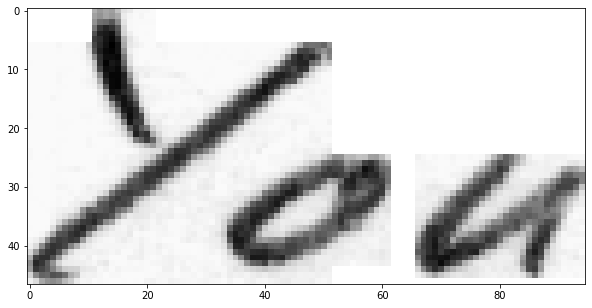

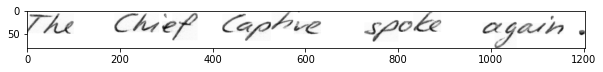

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for file_name in img_files[:2]:
    img = mpimg.imread(file_name)
    plt.figure(figsize = (10,10))
    plt.imshow(img, cmap ='gray')
    print(img.shape)

In [6]:
labelled_data = np.stack([img_files, img_targets], axis=1)

print(labelled_data.shape)

(4901, 2)


In [7]:
from sklearn.utils import shuffle
from PIL import Image
import random

CROP_SIZE = 113
NUM_LABELS = 50

def get_augmented_sample(sample, label, sample_ratio):
    # Get current image details
    img = Image.open(sample)
    img_width = img.size[0]
    img_height = img.size[1]

    # Compute resize dimensions such that aspect ratio is maintained
    height_fac = CROP_SIZE / img_height
    size = (int(img_width * height_fac), CROP_SIZE)

    # Resize image 
    new_img = img.resize((size), Image.ANTIALIAS)
    new_img_width = new_img.size[0]
    new_img_height = new_img.size[1]

    # Generate a random number of crops of size 113x113 from the resized image
    x_coord = list(range(0, new_img_width - CROP_SIZE))
    num_crops = int(len(x_coord) * sample_ratio)
    random_x_coord = random.sample(x_coord, num_crops)
    
    # Create augmented images (cropped forms) and map them to a label (writer)
    images = []
    labels = []
    for x in random_x_coord:
        img_crop = new_img.crop((x, 0, x + CROP_SIZE, CROP_SIZE))
        # Transform image to an array of numbers
        images.append(np.asarray(img_crop))
        labels.append(label)

    return images, labels

In [8]:
labelled_data_0 = labelled_data[labelled_data[:,1] == '000']

print(labelled_data_0.shape)

labelled_data_0 = labelled_data_0[:98]
print(labelled_data_0.shape)

print(np.unique(labelled_data_0[:,1]))

(693, 2)
(98, 2)
['000']


In [9]:
remove_0 = labelled_data[labelled_data[:,1]!='000']

print(np.unique(remove_0[:,1]))
print(np.unique(remove_0[:,1]).shape)

['085' '118' '150' '151' '152' '153' '154' '155' '202' '203' '204' '205'
 '206' '207' '208' '209' '247' '248' '273' '274' '315' '332' '333' '334'
 '335' '336' '337' '338' '339' '340' '341' '342' '343' '344' '345' '346'
 '347' '348' '349' '384' '415' '551' '552' '567' '588' '634' '635' '670'
 '671']
(49,)


In [10]:
y = [remove_0[remove_0[:,1]==k] for k in np.unique(remove_0[:,1])]
print(len(y))

49


In [11]:
labelled_data_1 = []
for i in y:
    labelled_data_1.append(i[:2])
print(len(labelled_data_1))

labelled_data_1 = np.array(labelled_data_1)

print(labelled_data_1.shape)

49
(49, 2, 2)


In [12]:
labelled_data_1=labelled_data_1.reshape(-1,2)

In [13]:
print(np.unique(labelled_data_1[:,1]))

['085' '118' '150' '151' '152' '153' '154' '155' '202' '203' '204' '205'
 '206' '207' '208' '209' '247' '248' '273' '274' '315' '332' '333' '334'
 '335' '336' '337' '338' '339' '340' '341' '342' '343' '344' '345' '346'
 '347' '348' '349' '384' '415' '551' '552' '567' '588' '634' '635' '670'
 '671']


In [14]:
labelled_data_new = np.concatenate((labelled_data_0, labelled_data_1))
np.random.shuffle(labelled_data_new)
print(labelled_data_new.shape) # mix of sentences from writer id 0 and others, labelled

(196, 2)


In [15]:
def augment(data, labels):
    augmented_sample_list = []
    augmented_label_list = []
    for i in range(len(data)):
        augmented_samples, augmented_labels = get_augmented_sample(data[i], labels[i],0.05)
        augmented_sample_list.append(augmented_samples)
        augmented_label_list.append(augmented_labels)
    return augmented_sample_list, augmented_label_list

In [16]:
# split before augmenting to ensure the sentences are being split and not the augmented samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(labelled_data_new[:,0], labelled_data_new[:,1], test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(131,) (65,) (131,) (65,)


In [17]:
augsamps, auglbls = augment(X_train, y_train) # returns two lists of arrays
ausamps_test, auglbls_test = augment(X_test, y_test)

In [18]:
import operator
from functools import reduce

# flattening the lists
aug_samps = reduce(operator.add, augsamps)
aug_lbls = reduce(operator.add, auglbls)

aug_samps_test = reduce(operator.add, ausamps_test)
aug_lbls_test = reduce(operator.add, auglbls_test)
print(len(aug_samps))
print(len(aug_lbls))

print(len(aug_samps_test))
print(len(aug_lbls_test))

9974
9974
4948
4948


In [19]:
# converting lists to arrays
aug_samps_arr = np.array(aug_samps)
aug_lbls_arr = np.array(aug_lbls)
aug_samps_arr_test = np.array(aug_samps_test)
aug_lbls_arr_test = np.array(aug_lbls_test)

print(aug_samps_arr.shape)
print(aug_lbls_arr.shape)
print(aug_samps_arr_test.shape)
print(aug_lbls_arr_test.shape)

(9974, 113, 113)
(9974,)
(4948, 113, 113)
(4948,)


(80, 1203)


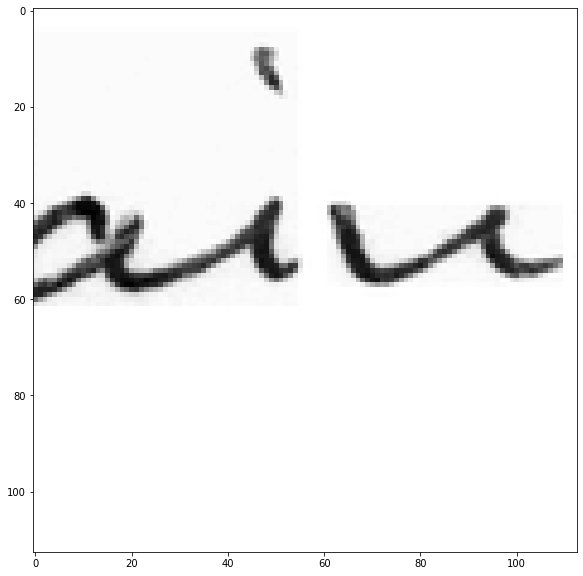

In [20]:
# for file_name in img_files[:2]:
    # img = mpimg.imread(file_name)
plt.figure(figsize = (10,10))
plt.imshow(aug_samps_arr[8], cmap ='gray')
print(img.shape)

In [21]:
X_train = aug_samps_arr
X_train = X_train.reshape(X_train.shape[0], 1, CROP_SIZE, CROP_SIZE)
X_train = X_train.astype('float16')
X_train /= 255.0
y_train = aug_lbls_arr

In [22]:
X_test = aug_samps_arr_test
X_test = X_test.reshape(X_test.shape[0], 1, CROP_SIZE, CROP_SIZE)
X_test = X_test.astype('float16')
X_test /= 255.0
y_test = aug_lbls_arr_test

In [23]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(9974, 1, 113, 113)
(9974,)
(4948, 1, 113, 113)
(4948,)


In [24]:
new = np.unique(y_train)
print(new)

y_train[y_train !='000'] = 1
new = np.unique(y_train)
print(new)

y_train[y_train=='000'] = 0 # 0 is 0
new = np.unique(y_train)
print(new)

print(y_train.shape)

y_train = y_train.astype('float16')

print(np.unique(y_train))

['000' '085' '118' '150' '151' '153' '154' '155' '202' '203' '204' '205'
 '206' '207' '208' '209' '247' '248' '273' '274' '315' '332' '333' '334'
 '335' '338' '339' '341' '343' '344' '345' '347' '348' '349' '384' '415'
 '551' '552' '567' '588' '634' '635' '670' '671']
['000' '1']
['0' '1']
(9974,)
[0. 1.]


In [25]:
new = np.unique(y_test)
print(new)

y_test[y_test !='000'] = 1
new = np.unique(y_test)
print(new)

y_test[y_test=='000'] = 0
new = np.unique(y_test)
print(new)

print(y_test.shape)

y_test = y_test.astype('float16')

print(np.unique(y_test))

['000' '085' '118' '150' '152' '154' '204' '205' '206' '208' '209' '247'
 '273' '333' '334' '336' '337' '338' '339' '340' '342' '343' '346' '347'
 '349' '415' '551' '552' '588' '634']
['000' '1']
['0' '1']
(4948,)
[0. 1.]


In [26]:
torch.manual_seed(42)
CUDA = torch.cuda.is_available()
device = torch.device('cuda' if CUDA else 'cpu')
kwargs = {'num_workers': 1, 'pin_memory': True} if CUDA else {}
device

device(type='cuda')

In [27]:
from torch.utils.data import TensorDataset, DataLoader
from torch import nn


tensor_x_train = torch.Tensor(X_train).type(torch.cuda.FloatTensor) # transform to torch tensor
tensor_y_train = torch.Tensor(y_train).type(torch.cuda.FloatTensor).long()

# tensor_x_train = torch.Tensor(X_train) # transform to torch tensor
# tensor_y_train = torch.Tensor(y_train).long()

train_dataset = TensorDataset(tensor_x_train,tensor_y_train) # create your datset
train_dataloader = DataLoader(train_dataset,batch_size=64, shuffle=True, drop_last=True) # create your dataloader

In [28]:
tensor_x_train.shape

torch.Size([9974, 1, 113, 113])

In [29]:
tensor_x_test = torch.Tensor(X_test).type(torch.cuda.FloatTensor) # transform to torch tensor
tensor_y_test = torch.Tensor(y_test).long().type(torch.cuda.FloatTensor).long()

# tensor_x_test = torch.Tensor(X_test) # transform to torch tensor
# tensor_y_test = torch.Tensor(y_test).long()

test_dataset = TensorDataset(tensor_x_test,tensor_y_test) # create your datset
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False, drop_last=True) # create your dataloader

In [30]:
# from torch.utils import model_zoo
# def _load_pretrained(model, url, inchans=3):
#     state_dict = model_zoo.load_url(url)
#     if inchans == 1:
#         conv1_weight = state_dict['conv1.weight']
#         state_dict['conv1.weight'] = conv1_weight.sum(dim=1, keepdim=True)
#     elif inchans != 3:
#         assert False, "Invalid number of inchans for pretrained weights"
#     model.load_state_dict(state_dict)

In [31]:
import torch
import torchvision.models as models
model = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [32]:
# # path = '/content/drive/MyDrive/iam_dataset/'
# import os
# if os.path.exists('/content/drive/MyDrive/iam_dataset'+'/model.pt'):
#     print('Loading checkpoint: %s' % os.getcwd()+'/model.pt')
#     path = torch.load('/content/drive/MyDrive/iam_dataset'+'/model.pt')
#     epoch = path['epoch']
#     model.load_state_dict(path['model'])
#     optimizer.load_state_dict(path['optimizer'])

In [33]:
print(model.conv1)
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False).to(device)
print(model.conv1)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2).to(device)
# print(model.conv1)...change first conv to take 1 channel instead of 3

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)


In [46]:
# torch.hub._validate_not_a_forked_repo=lambda a,b,c: True

# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=False)
# model = model.cuda() if device else model

# first_conv_layer = [nn.Conv2d(1, 3, kernel_size=3, stride=1, padding=1, dilation=1, groups=1, bias=True)]
# first_conv_layer.extend(list(model.children()))  
# model = nn.Sequential(*first_conv_layer )  


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)
model.to(device)
print(next(model.parameters()).device)

cuda:0


In [47]:
print(model)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [48]:
for param in model.parameters():
  param.requires_grad = False

In [49]:
for param in model.layer4.parameters():
  param.requires_grad = True

In [50]:
for param in model.parameters():
  print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False


In [51]:
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2).to(device)

In [52]:
train_losses = []
train_loss_record = []

In [53]:
# if os.path.exists(os.getcwd()+'/model.pt'):
#     print('Loading checkpoint: %s' % os.getcwd()+'/model.pt')
#     path = torch.load(os.getcwd()+'/model.pt')
#     epoch = path['epoch']
#     model.load_state_dict(path['model']).to(device)
#     optimizer.load_state_dict(path['optimizer']).to(device)

In [54]:
from datetime import datetime
train_log_string = '%s :: Epoch %i :: Iter %i / %i :: train loss: %0.4f'
def train(epoch):
    print('Start Epoch {} Training...'.format(epoch))
    model.train()
    train_loss = []
    train_loss_sum = []
    for idx, (data, target) in enumerate(train_dataloader):
        # data = data.to(device)
        # target = target.to(device)
        # print(data.shape)
        optimizer.zero_grad()
        #  forward-pass
        output = model(data)
        loss = criterion(output, target)
        #backward-pass
        loss.backward()
        # Update the parameters
        optimizer.step()
        train_loss.append(loss.data.cpu().numpy())
        train_loss_sum.append(loss)
        if ((idx +1) % 5000) == 0:
          print(train_log_string % (datetime.now(), epoch, idx + 1, len(train_dataloader), np.mean(train_loss)))
          train_loss = []
    mean_tr = torch.mean(torch.stack(train_loss_sum))
    print('Train Loss at epoch {}: {}\n'.format(epoch, mean_tr))
    train_loss_record.append(mean_tr)
    return train_loss_record

In [55]:
for epoch in range(10):
    tlr = train(epoch)

Start Epoch 0 Training...
Train Loss at epoch 0: 0.12681551277637482

Start Epoch 1 Training...
Train Loss at epoch 1: 0.042456772178411484

Start Epoch 2 Training...
Train Loss at epoch 2: 0.03256659954786301

Start Epoch 3 Training...
Train Loss at epoch 3: 0.022606968879699707

Start Epoch 4 Training...
Train Loss at epoch 4: 0.02231491357088089

Start Epoch 5 Training...
Train Loss at epoch 5: 0.018141238018870354

Start Epoch 6 Training...
Train Loss at epoch 6: 0.011156369931995869

Start Epoch 7 Training...
Train Loss at epoch 7: 0.01663094386458397

Start Epoch 8 Training...
Train Loss at epoch 8: 0.01279997918754816

Start Epoch 9 Training...
Train Loss at epoch 9: 0.018366936594247818



In [56]:
result = []
prediction = []
model.eval()
with torch.no_grad():
    for idx, (data, target) in enumerate(test_dataloader):
        # data = data.to(device)
        # target = target.to(device)
        # cuda_check = data.is_cuda
        # if cuda_check:
        #   get_cuda_device = data.get_device()
          # print(">>", get_cuda_device)
        output = model(data)
        output_sm = nn.Softmax(dim=1)(output)
        _, predicted = torch.max(output, 1)
        prediction.append(predicted)
        result.append(output_sm)
        
result = torch.stack(result).detach().cpu().numpy()
prediction = torch.stack(prediction).detach().cpu().numpy()

print(result.shape, prediction.shape)

(77, 64, 2) (77, 64)


In [57]:
print(prediction.reshape(-1).shape)

(4928,)


In [58]:
print(result.reshape(-1,2).shape)

(4928, 2)


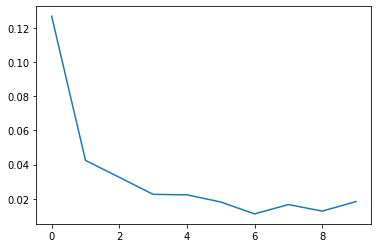

In [59]:
plt.plot(tlr)

In [60]:
if not os.path.exists('/content/drive/MyDrive/iam_dataset/saved_model/resnet'):
  os.makedirs('/content/drive/MyDrive/iam_dataset/saved_model/resnet')

In [61]:
# save trained model
state_dict = {
    # 'epoch': epoch,
    'model': model.state_dict(),
    'optimizer': optimizer.state_dict(),
}
torch.save(state_dict, '/content/drive/MyDrive/iam_dataset/saved_model/resnet/model_pretrained.pt')

In [62]:
import pandas as pd
res = pd.DataFrame(result.reshape(-1,2))
pred = pd.DataFrame(prediction.reshape(-1))

res.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/resnet/results_pretrained.csv", header=False, index=False)
pred.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/resnet/pred_pretrained.csv", header=False, index=False)

In [63]:
print(res.shape, pred.shape)

y_test_new = y_train[:result.reshape(-1,2).shape[0]]

print(y_test_new.shape)

(4928, 2) (4928, 1)
(4928,)


In [64]:
result_df = pd.DataFrame({'ground truth': y_test_new, 'NN output': prediction.reshape(-1), 'probs 0': res[0], 'probs 1': res[1]})
result_df

,ground truth,NN output,probs 0,probs 1
0,1.0,1,2.115321e-07,1.000000
1,1.0,1,5.552699e-05,0.999944
2,1.0,1,4.833749e-08,1.000000
3,1.0,1,3.834027e-04,0.999617
4,1.0,1,1.508801e-03,0.998491
...,...,...,...,...
4923,0.0,1,4.623935e-08,1.000000
4924,0.0,0,9.015726e-01,0.098427
4925,0.0,1,1.580515e-04,0.999842
4926,0.0,1,1.611726e-05,0.999984


In [65]:
# work out the accuracy and other metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
actual = result_df['ground truth']
predicted = result_df['NN output']
# confusion matrix
matrix = confusion_matrix(actual, predicted, labels=[0,1])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual, predicted, labels=[0,1]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix_2 = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix_2)

Confusion matrix : 
 [[1841 1241]
 [1118  728]]
Outcome values : 
 1841 1241 1118 728
Classification report : 
               precision    recall  f1-score   support

           1       0.37      0.39      0.38      1846
           0       0.62      0.60      0.61      3082

    accuracy                           0.52      4928
   macro avg       0.50      0.50      0.50      4928
weighted avg       0.53      0.52      0.52      4928



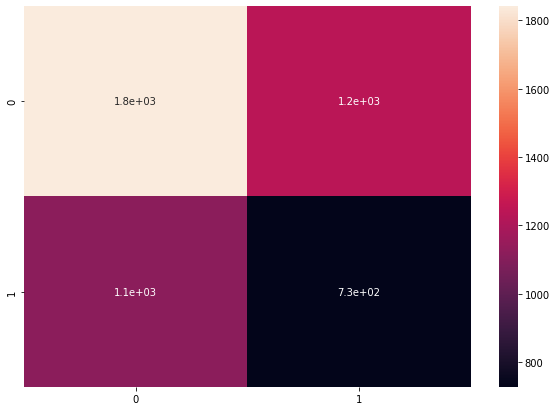

In [66]:
import seaborn as sn
df_cm = pd.DataFrame(matrix, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
matrix = classification_report(actual,predicted,labels=[0,1], output_dict=True)
print('Classification report : \n',matrix)
accuracy_score(actual, predicted)

Classification report : 
 {'0': {'precision': 0.6221696519094289, 'recall': 0.5973393900064893, 'f1-score': 0.6095017381228273, 'support': 3082}, '1': {'precision': 0.3697308278313865, 'recall': 0.39436619718309857, 'f1-score': 0.381651376146789, 'support': 1846}, 'accuracy': 0.5213068181818182, 'macro avg': {'precision': 0.49595023987040765, 'recall': 0.49585279359479395, 'f1-score': 0.49557655713480814, 'support': 4928}, 'weighted avg': {'precision': 0.5276075437016233, 'recall': 0.5213068181818182, 'f1-score': 0.5241503241196279, 'support': 4928}}


0.5213068181818182

In [68]:
matrix_df = pd.DataFrame(matrix).transpose()

matrix_df.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/resnet/classification_report_pretrained.csv", header=False, index=False)

# pd.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/classification_report.txt",matrix)
